# import

In [168]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# check data

In [142]:
df = pd.read_csv("../data/input/diabetes.csv")

In [143]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [144]:
df.shape

(442, 11)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [146]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


# preprocessing

In [ ]:
y = df["Y"].values.reshape(-1, 1)

In [148]:
x = df["BMI"].values.reshape(-1, 1)

In [149]:
x.shape

(442, 1)

In [150]:
train_x, train_y, test_x, test_y = (
    x[:-20],
    y[:-20],
    x[-20:],
    y[-20:],
)

In [152]:
model = linear_model.LinearRegression()

In [153]:
model.fit(train_x, train_y)

LinearRegression()

In [154]:
y_pred = model.predict(x)

In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
mse = mean_squared_error(y, y_pred)

In [157]:
mse

3891.357072646849

In [158]:
y_test_pred = model.predict(test_x)

In [159]:
from sklearn.metrics import r2_score

In [160]:
r2_score(test_y, y_test_pred)

0.4725754479822717

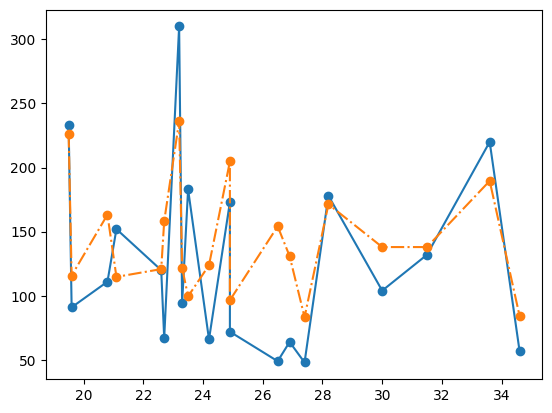

In [167]:
import matplotlib.pyplot as plt

plt.plot(sorted(test_x), test_y, marker="o")
plt.plot(sorted(test_x), y_test_pred, linestyle="dashdot", marker="o")
plt.show()